<a href="https://colab.research.google.com/github/w4bo/handsOnDataPipelines/blob/main/01-MachineLearning/05-BreastCancer.solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The `Breast Cancer` challenge

### Goal

It is your job to predict the `diagnosis` for each data item.

### Metric

Submissions are evaluated using the accuracy score. When splitting train and test datasets, the test dataset should contain 30% of the data.

### Requirements

You are allowed to use `numpy`, `pandas`, `matplotlib`, `sns`, and `sk-learn` Python libraries. You can import any model from `sk-learn`.

In [1]:
# Import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics # for the check the error and accuracy of the model
import random
import os

# SEED all random generators
seed = 42
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

# read the data
# df = pd.read_csv("datasets/breastcancer.csv")
df = pd.read_csv("https://raw.githubusercontent.com/w4bo/handsOnDataPipelines/main/01-MachineLearning/datasets/breastcancer.csv")

## Data understanding

Hints

- There are 569 observations with 30 features each
- Each observation is labelled with a `diagnosis`

Take a first glance to the dataset
- Do we consider all features?
- Are there null values?
- Which are the attribute types?
- Which are the attribute ranges?
- How many labels?
- Are classes unbalanced?



In [2]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Feature semantics

Hint:
- id of the observation
- diagnosis (M = malignant, B = benign)
- Ten real-valued features are computed for each cell nucleus:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

`*_mean`: the means of all cells

`*_se`: standard error of all cells

`*_worst`: the worst cell


In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

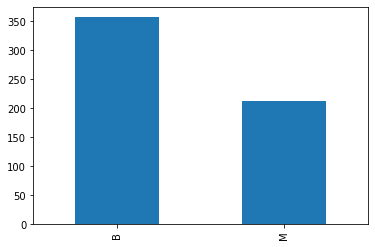

In [6]:
df['diagnosis'].value_counts().plot(kind="bar", label="Count")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


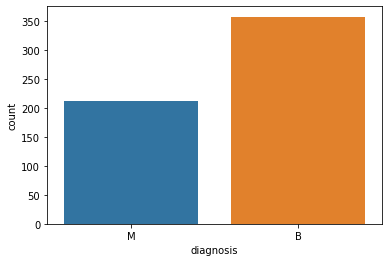

In [7]:
sns.countplot(df['diagnosis'], label="Count")

### Summing up

| Question | Answer | Do we need action? |
| -        | -      | - |
| Are there null values? | Yes | No need for imputation, drop the column |
| Which are the attribute types? | All attributes are numeric but `diagnosis` | Encode diagnosis | 
| Which are the attribute ranges? | Attribute ranges are similar | We could apply normalization |
| How many labels? | 2 | - |
| Are classes unbalanced? | No, classess are almost equally distributed | No rebalancing |

## Data preprocessing

Drop the unnecessary columns

In [8]:
# `Unnamed:32` has 0 non null objects, all values are null. Drop the column
df.drop(["id", "Unnamed: 32"], axis=1, inplace=True)

In [9]:
# map the diagnosis column to numeric
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

### Data visualization

- Check the attribute's distribution
- Check the relationships between attributes (e.g., the correlation). Should we keep all attributes?

For now, let's just focus on `*_mean` attributes

In [10]:
# Data can be divided into three parts (i.e., families of columns)
features_mean = list(df.columns[1:11]) + ["diagnosis"]
features_se = list(df.columns[11:20]) + ["diagnosis"]
features_worst = list(df.columns[21:31]) + ["diagnosis"]
print("features_mean: " + str(features_mean))
print("features_se: " + str(features_se))
print("features_worst: " + str(features_worst))

features_mean: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'diagnosis']
features_se: ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'diagnosis']
features_worst: ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'diagnosis']


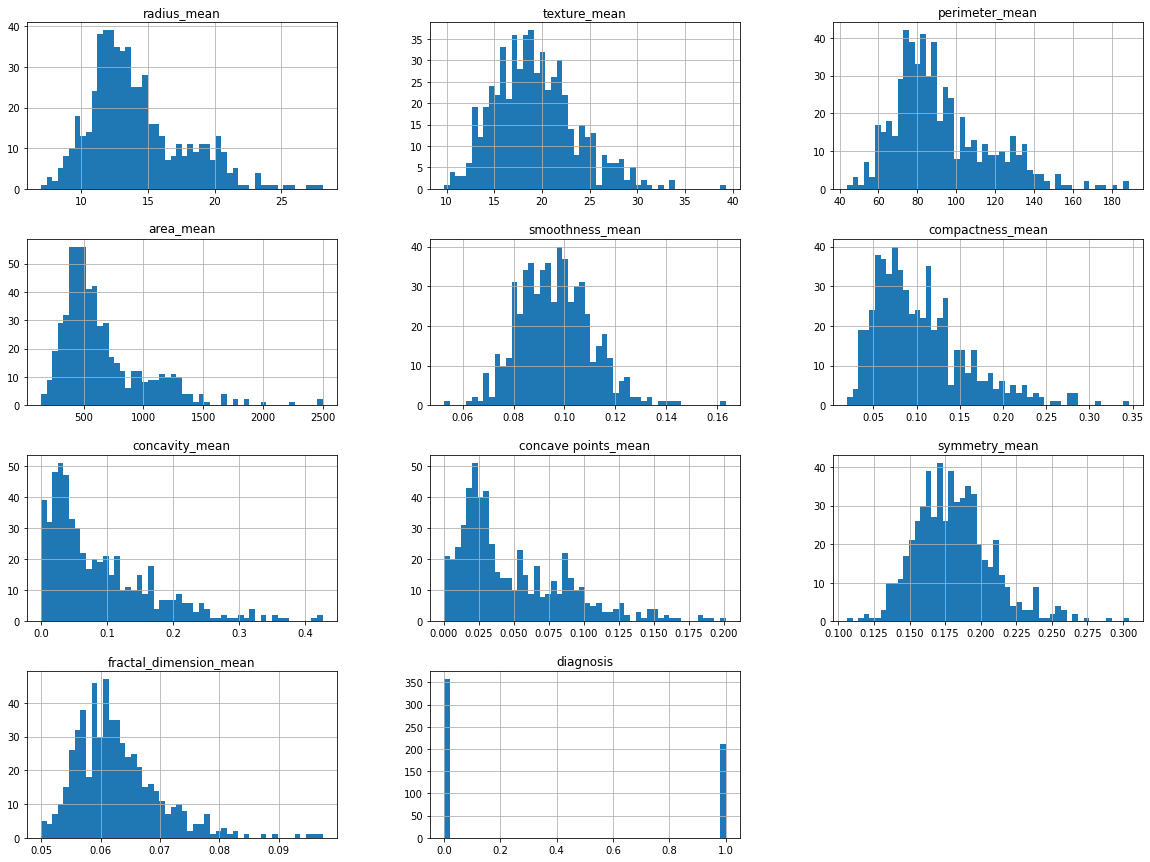

In [11]:
df[features_mean].hist(bins=50, figsize=(20,15))
plt.show()

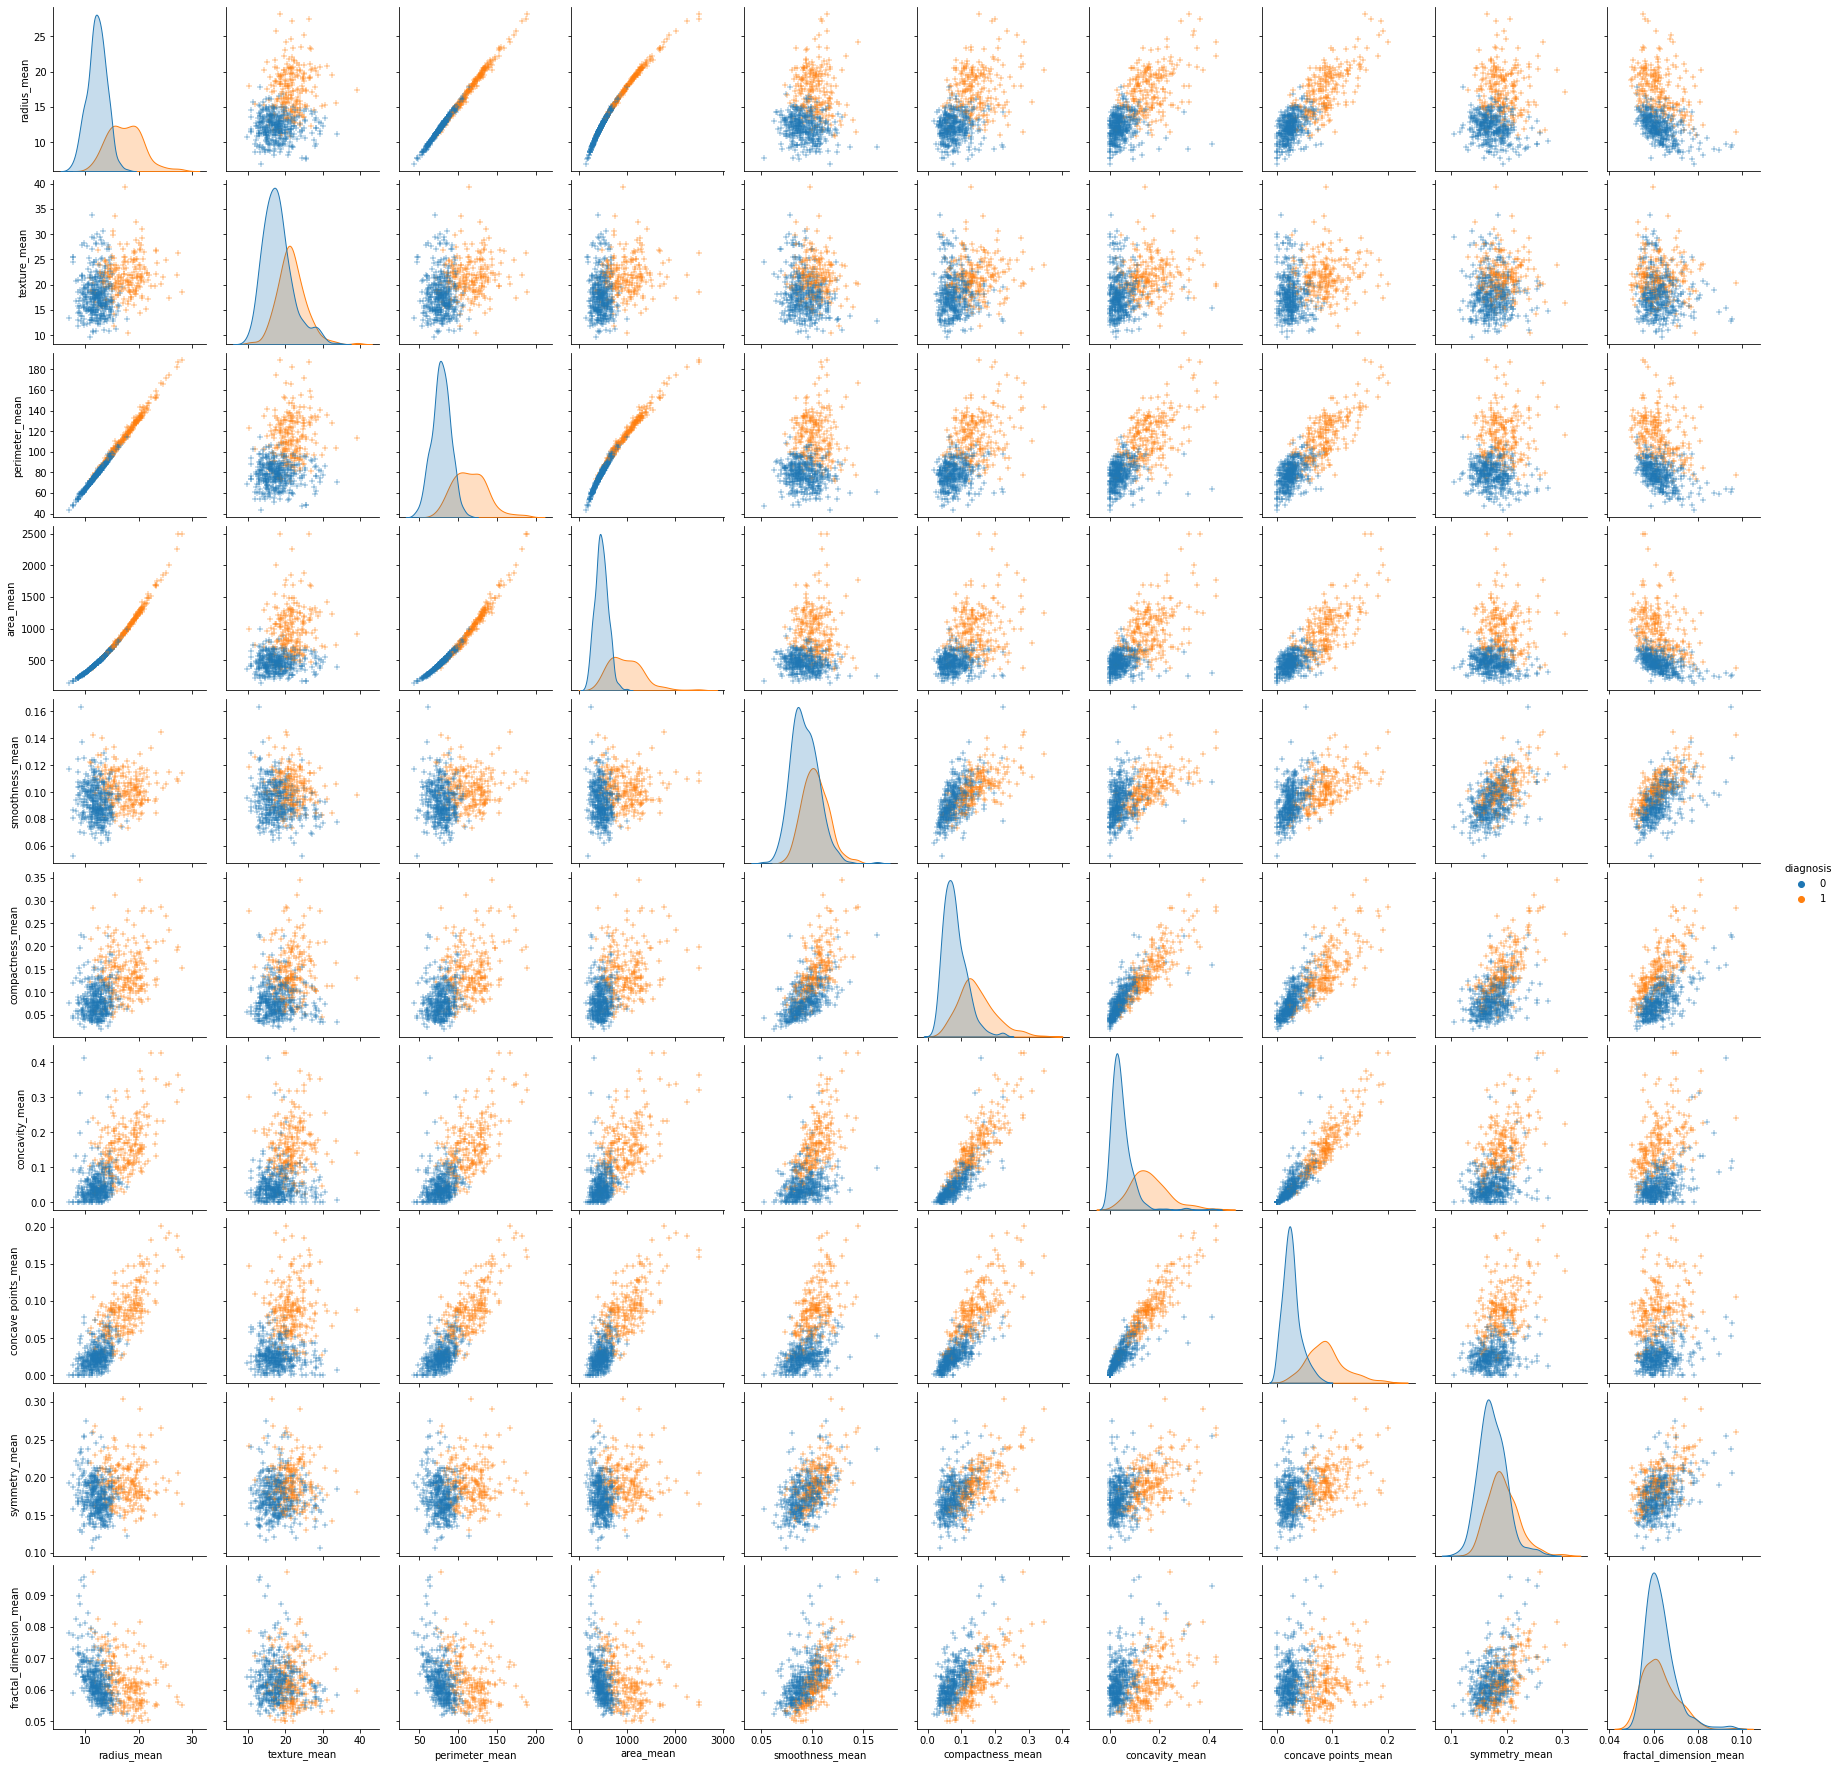

In [12]:
g = sns.pairplot(df[features_mean], hue='diagnosis', markers='+')
plt.show()

In [13]:
# df[features_se].hist(bins=50, figsize=(20,15))
# plt.show()

In [14]:
# g = sns.pairplot(df[features_se], hue='diagnosis', markers='+')
# plt.show()

In [15]:
#  df[features_worst].hist(bins=50, figsize=(20,15))
# plt.show()

In [16]:
# g = sns.pairplot(df[features_worst], hue='diagnosis', markers='+')
# plt.show()

In [17]:
df = df[features_mean]
from scipy.stats import pearsonr
rho = df.corr(method ='pearson')
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01, 0.05, 0.1] if x <= t]))
rho.round(2).astype(str) + p

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
radius_mean,1.0***,0.32***,1.0***,0.99***,0.17***,0.51***,0.68***,0.82***,0.15***,-0.31***,0.73***
texture_mean,0.32***,1.0***,0.33***,0.32***,-0.02,0.24***,0.3***,0.29***,0.07*,-0.08*,0.42***
perimeter_mean,1.0***,0.33***,1.0***,0.99***,0.21***,0.56***,0.72***,0.85***,0.18***,-0.26***,0.74***
area_mean,0.99***,0.32***,0.99***,1.0***,0.18***,0.5***,0.69***,0.82***,0.15***,-0.28***,0.71***
smoothness_mean,0.17***,-0.02,0.21***,0.18***,1.0***,0.66***,0.52***,0.55***,0.56***,0.58***,0.36***
compactness_mean,0.51***,0.24***,0.56***,0.5***,0.66***,1.0***,0.88***,0.83***,0.6***,0.57***,0.6***
concavity_mean,0.68***,0.3***,0.72***,0.69***,0.52***,0.88***,1.0***,0.92***,0.5***,0.34***,0.7***
concave points_mean,0.82***,0.29***,0.85***,0.82***,0.55***,0.83***,0.92***,1.0***,0.46***,0.17***,0.78***
symmetry_mean,0.15***,0.07*,0.18***,0.15***,0.56***,0.6***,0.5***,0.46***,1.0***,0.48***,0.33***
fractal_dimension_mean,-0.31***,-0.08*,-0.26***,-0.28***,0.58***,0.57***,0.34***,0.17***,0.48***,1.0***,-0.01


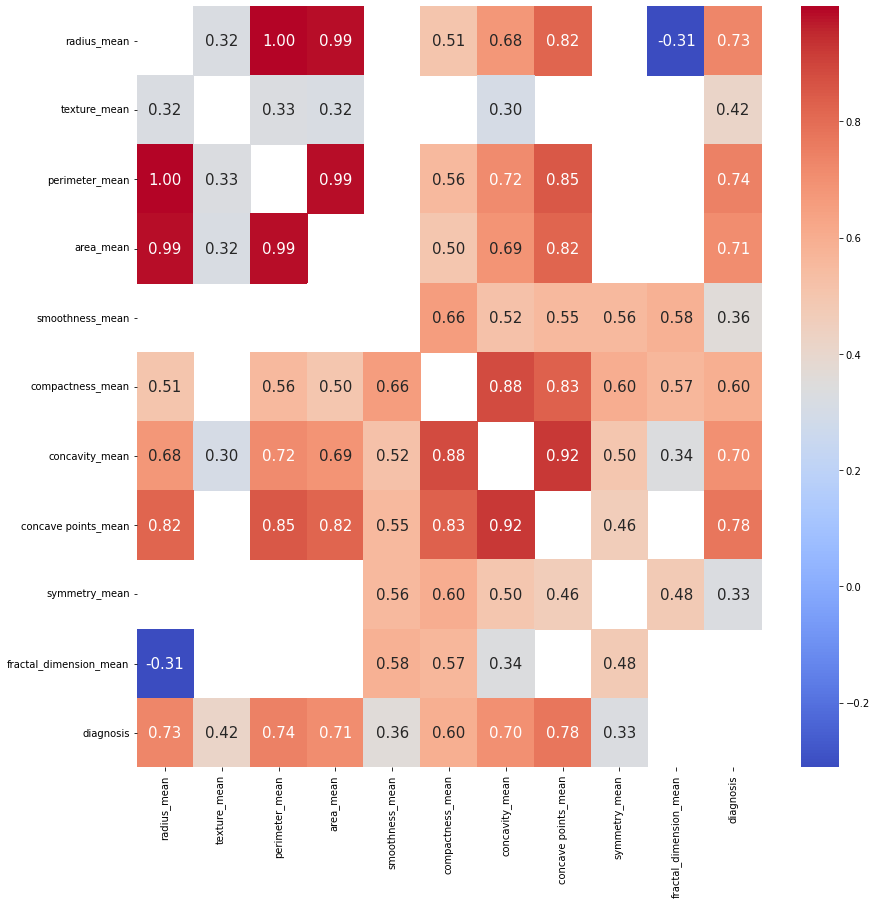

In [18]:
min_corr = 0.3
kot = rho[(abs(rho) >= min_corr) & (rho < 1)]
plt.figure(figsize=(14, 14))
sns.heatmap(kot, cmap=sns.color_palette("coolwarm", as_cmap=True), annot=True, fmt= '.2f',annot_kws={'size': 15})

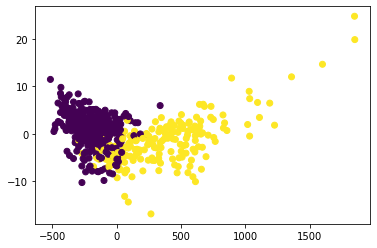

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(df.values)

plt.scatter(
    x=result[:,0], 
    y=result[:,1] , 
    c=df["diagnosis"],
    cmap='viridis'
)

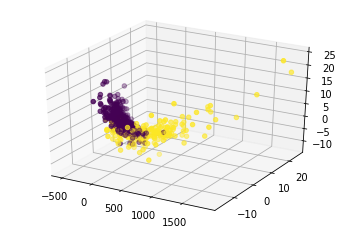

In [20]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

pca = PCA(n_components=3)
result = pca.fit_transform(df.values)

ax.scatter(
    xs=result[:,0], 
    ys=result[:,1], 
    zs=result[:,2], 
    c=df["diagnosis"],
    cmap='viridis'
)

True     496
False     73
Name: outlier, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


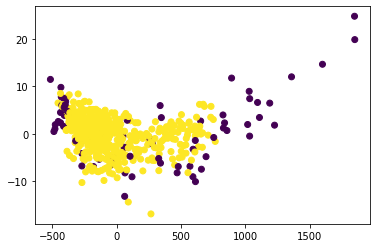

In [21]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest()
clf.fit(df.values)

y_pred_train = clf.predict(df.values)
y_pred_outliers = clf.predict(df.values)

df["outlier"] = y_pred_outliers
df["outlier"] = df["outlier"].map(lambda x: x == 1)

print(df["outlier"].value_counts())

plt.scatter(
    x=result[:,0], 
    y=result[:,1] , 
    c=df["outlier"],
    cmap='viridis'
)

### Should we drop some attributes?

- `radius_mean`, `perimeter_mean`, and `area_mean` are highly correlated, keep `permiter`
- `compactness_mean`, `concavity_mean` and `concavepoint_mean` are highly correlated, keep `compactness_mean`

In [22]:
# now these are the variables that we will use for prediction
prediction_var = ['texture_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean']

## Modeling with scikit-learn

Preparing the dataset for the ML pipeline.
- X: the dataset
- y: the labels

In [23]:
def set_dataset(feature_list):
    X = df[[x for x in feature_list if x != "diagnosis"]]
    y = df['diagnosis']
    # print(X.head())
    print(X.shape)
    # print(y.head())
    print(y.shape)
    return X, y

X, y = set_dataset(prediction_var)

(569, 5)
(569,)


In [24]:
X

,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,symmetry_mean
0,10.38,122.80,0.11840,0.27760,0.2419
1,17.77,132.90,0.08474,0.07864,0.1812
2,21.25,130.00,0.10960,0.15990,0.2069
3,20.38,77.58,0.14250,0.28390,0.2597
4,14.34,135.10,0.10030,0.13280,0.1809
...,...,...,...,...,...
564,22.39,142.00,0.11100,0.11590,0.1726
565,28.25,131.20,0.09780,0.10340,0.1752
566,28.08,108.30,0.08455,0.10230,0.1590
567,29.33,140.10,0.11780,0.27700,0.2397


In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

## Split the dataset into a training set and a testing set

### Advantages
- By splitting the dataset pseudo-randomly into a two separate sets, we can train using one set and test using another.
- This ensures that we won't use the same observations in both sets.
- More flexible and faster than creating a model using all of the dataset for training.

### Disadvantages
- The accuracy scores for the testing set can vary depending on what observations are in the set. 
- This disadvantage can be countered using k-fold cross-validation.

### Notes
- The accuracy score of the models depends on the observations in the testing set, which is determined by the seed of the pseudo-random number generator (random_state parameter).
- As a model's complexity increases, the training accuracy (accuracy you get when you train and test the model on the same data) increases.
- If a model is too complex or not complex enough, the testing accuracy is lower.
- For KNN models, the value of k determines the level of complexity. A lower value of k means that the model is more complex.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=round(len(df.index) / 5))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 5)
(455,)
(114, 5)
(114,)


In [37]:
# all parameters not specified are set to their defaults
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.935672514619883

Fit your model and try it with several parameters

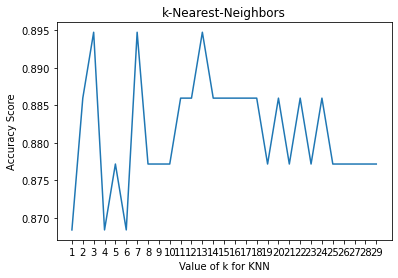

In [27]:
def fit_knn(X_train, y_train, X_test, y_test):
    # experimenting with different k values
    k_range = list(range(1, 30))
    scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        scores.append(metrics.accuracy_score(y_test, y_pred))

    plt.plot(k_range, scores)
    plt.xticks(k_range)
    plt.xlabel('Value of k for KNN')
    plt.ylabel('Accuracy Score')
    plt.title('k-Nearest-Neighbors')
    plt.show()

fit_knn(X_train, y_train, X_test, y_test)

What if I compare the model vs the model trained on the training set only?

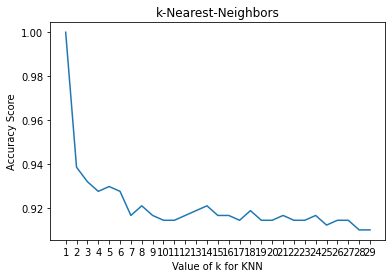

In [28]:
fit_knn(X_train, y_train, X_train, y_train)

What if I choose a more complex model?

In [29]:
def fit_forest(X_train, y_train, X_test, y_test):
    model=RandomForestClassifier(n_estimators=100) # a simple random forest model
    model.fit(X_train, y_train) # now fit our model for training data
    y_pred = model.predict(X_test) # predict for the test data
    # prediction will contain the predicted value by our model predicted values of dignosis column for test inputs
    print("Accuracy: " + str(metrics.accuracy_score(y_pred, y_test))) # to check the accuracy
    # here we will use accuracy measurement between our predicted value and our test output values
    featimp = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    print("\nFeatures sorted by descending importance:")
    print(featimp) # this is the property of Random Forest classifier that it provide us the importance of the features used

fit_forest(X_train, y_train, X_test, y_test)

Accuracy: 0.9122807017543859

Features sorted by descending importance:
perimeter_mean      0.508651
compactness_mean    0.188422
texture_mean        0.166423
smoothness_mean     0.086978
symmetry_mean       0.049526
dtype: float64


Now lets do this for all `feature_mean` so that from Random forest we can get the feature which are important

In [30]:
X, y = set_dataset(features_mean) # taking all features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
fit_forest(X_train, y_train, X_test, y_test)

(569, 10)
(569,)
Accuracy: 0.9590643274853801

Features sorted by descending importance:
concave points_mean       0.239787
concavity_mean            0.239186
perimeter_mean            0.170686
area_mean                 0.099084
radius_mean               0.084284
texture_mean              0.063634
compactness_mean          0.037038
smoothness_mean           0.032543
fractal_dimension_mean    0.017646
symmetry_mean             0.016110
dtype: float64


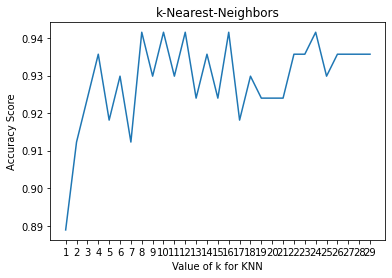

In [31]:
fit_knn(X_train, y_train, X_test, y_test)

What if we use cross-validation?

https://scikit-learn.org/stable/modules/cross_validation.html

In [32]:
from sklearn.model_selection import cross_val_score

def cv(model, X, y):
    scores = cross_val_score(model, X, y, cv=5)
    print("Scores: " + str(scores))
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

model = RandomForestClassifier(n_estimators=100)
cv(model, X, y)

Scores: [0.90350877 0.93859649 0.93859649 0.96491228 0.96460177]
0.94 accuracy with a standard deviation of 0.02


In [33]:
model = KNeighborsClassifier(n_neighbors=10)
cv(model, X, y)

Scores: [0.83333333 0.85964912 0.88596491 0.94736842 0.92920354]
0.89 accuracy with a standard deviation of 0.04


Grid search

In [34]:
# lets Make a function for Grid Search CV
def gridsearch_cv(model,param_grid, X_train, y_train):
    clf = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=2)
    clf.fit(X_train, y_train)
    print("The best parameters are:")
    print(clf.best_params_)
    print("The best estimator is " + str(clf.best_estimator_))
    print("The best score is " + str(clf.best_score_))

In [35]:
model = KNeighborsClassifier()

k_range = list(range(1, 30, 3))
leaf_size = list(range(1, 30, 3))
param_grid = {'n_neighbors': k_range, 'leaf_size': leaf_size} #, 'weights': ['uniform', 'distance']}

gridsearch_cv(model, param_grid, X, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
The best parameters are:
{'leaf_size': 1, 'n_neighbors': 25}
The best estimator is KNeighborsClassifier(leaf_size=1, n_neighbors=25)
The best score is 0.8928582518242509


In [36]:
model = RandomForestClassifier()

estimator_range = [10, 50, 100]
param_grid = {'n_estimators': estimator_range}

gridsearch_cv(model, param_grid, X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
The best parameters are:
{'n_estimators': 50}
The best estimator is RandomForestClassifier(n_estimators=50)
The best score is 0.9473063188945815
